<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/TransferLaerning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 #Get data (10% of 10 food classes from Food101) - https://www.kaggle.com/dansbecker/food-101 
import zipfile

# Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-18 08:22:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.164.144, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   203MB/s    in 0.8s    

2022-05-18 08:22:49 (203 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
import os 
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images is '{dirpath}'")

There are 2 directories and 0 images is '10_food_classes_10_percent'
There are 10 directories and 0 images is '10_food_classes_10_percent/train'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/chicken_curry'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/grilled_salmon'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/pizza'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/ice_cream'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/sushi'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/fried_rice'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/chicken_wings'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/steak'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/ramen'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/hamburge

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_data_10p=train_datagen.flow_from_directory(train_dir,target_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [5]:
#setting up callbacks 
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [33]:
#comparing 2 tensorflow models
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
test= "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"

In [7]:
import tensorflow as tf
import tensorflow_hub as hub


In [8]:
def create_model(model_url,num_classes=10): # this function takes the tensorflow hub model and turn it to sequential model  and it returns a uncompiled model
  feature_extractor_layer=hub.KerasLayer(model_url,trainable=False,input_shape=IMAGE_SHAPE+(3,)) # this is freeze the already learned patterns 
  model=tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes,activation="softmax",name="output_layer")                             
  ])
  return model 

#creating and test  Resnet model and 

In [9]:
#create Resnet model 
resent_model=create_model(resnet_url,num_classes=train_data_10p.num_classes)#=10


In [10]:
resent_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [11]:
resent_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])


In [13]:
history1=resent_model.fit(train_data_10p,epochs=5,steps_per_epoch=len(train_data_10p), validation_data=test_data,validation_steps=len(test_data),callbacks=[create_tensorboard_callback(dir_name="tensorflwo-hub", experiment_name="resnet50v2")])

Saving TensorBoard log files to: tensorflwo-hub/resnet50v2/20220518-082336
Epoch 1/5
24/24 [==============================] - 17s 697ms/step - loss: 0.8558 - accuracy: 0.7453 - val_loss: 0.8343 - val_accuracy: 0.7308
Epoch 2/5
24/24 [==============================] - 16s 671ms/step - loss: 0.5997 - accuracy: 0.8200 - val_loss: 0.7404 - val_accuracy: 0.7648
Epoch 3/5
24/24 [==============================] - 17s 729ms/step - loss: 0.4545 - accuracy: 0.8853 - val_loss: 0.6995 - val_accuracy: 0.7724
Epoch 4/5
24/24 [==============================] - 20s 841ms/step - loss: 0.3629 - accuracy: 0.9173 - val_loss: 0.6688 - val_accuracy: 0.7828
Epoch 5/5
24/24 [==============================] - 16s 694ms/step - loss: 0.2988 - accuracy: 0.9480 - val_loss: 0.6595 - val_accuracy: 0.7800


In [14]:
resent_model.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 0.6595 - accuracy: 0.7800


[0.6594855189323425, 0.7799999713897705]

In [30]:
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

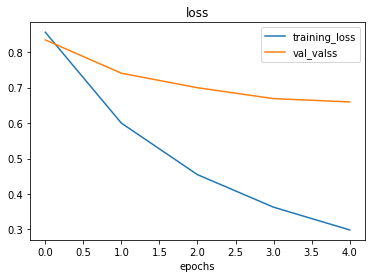

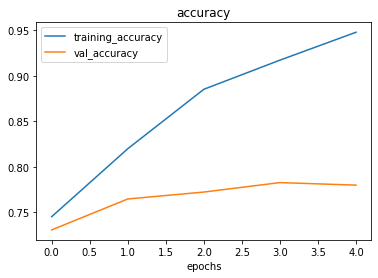

In [16]:
plot_loss_curvse(history1)

#creating and testing EfficientNet model

In [18]:
efficient_model=create_model(efficientnet_url,10)

In [19]:
efficient_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [21]:
efficient_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [32]:
efficient_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [26]:
history2=efficient_model.fit(train_data_10p,epochs=5,steps_per_epoch=len(train_data_10p),validation_data=test_data,validation_steps=len(test_data)
,callbacks=[create_tensorboard_callback(dir_name="tensorflwo-hub", experiment_name="resnet50v2")])

Saving TensorBoard log files to: tensorflwo-hub/resnet50v2/20220518-083529
Epoch 1/5
24/24 [==============================] - 16s 636ms/step - loss: 0.4447 - accuracy: 0.9147 - val_loss: 0.5213 - val_accuracy: 0.8640
Epoch 2/5
24/24 [==============================] - 16s 680ms/step - loss: 0.3929 - accuracy: 0.9240 - val_loss: 0.4936 - val_accuracy: 0.8692
Epoch 3/5
24/24 [==============================] - 15s 632ms/step - loss: 0.3495 - accuracy: 0.9347 - val_loss: 0.4741 - val_accuracy: 0.8684
Epoch 4/5
24/24 [==============================] - 15s 633ms/step - loss: 0.3139 - accuracy: 0.9440 - val_loss: 0.4570 - val_accuracy: 0.8732
Epoch 5/5
24/24 [==============================] - 15s 658ms/step - loss: 0.2852 - accuracy: 0.9520 - val_loss: 0.4470 - val_accuracy: 0.8724


In [27]:
efficient_model.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 0.4470 - accuracy: 0.8724


[0.44696763157844543, 0.8723999857902527]

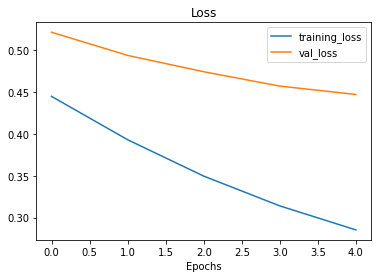

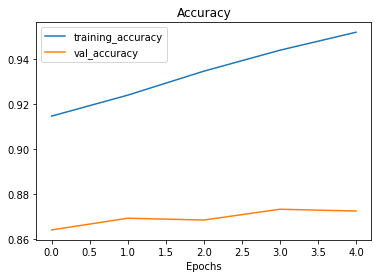

In [39]:
plot_loss_curves(history2)

#comparing 2 models 